***
**df veri seti** ; İlçelere göre evsel atık miktarlarını (ton) içerir. 2004-2021 yılları arasını kapsamaktadır.
<br>
**df_nüfus veri seti** ; İlçelere göre nüfus dağılımını içerir. 
***


***
Bu çalışmada, ilçelerin yıllara göre evsel atık miktarı dağılımları analiz edilmiş ve çalışma yıllara göre nüfus dağılımı verileri ile desteklenmiştir. Günümüze yakınsayabilmesi açısından çalışmada sadece 2019-2021 yılları arasındaki veriler ele alınmış ve diğer yıllardaki bilgiler veri setinden atılmıştır.
***

# Kütüphaneler 

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Veri setlerinin okunması 

In [48]:
df=pd.read_excel("ilce-yl-baznda-evsel-atk-miktar.xlsx") # evsel atık miktarı veri seti okundu

In [49]:
# İlçelerin yıllık nüfus dağılımları datalarının okunması
os.chdir('.\\Nüfus')
dosyalar = os.listdir(".")
df_nüfus=pd.read_excel(r"Adalar.xlsx")
df_nüfus=df_nüfus.iloc[:,0:2]
df_nüfus.set_index(keys="Yıl",inplace=True)

for dosya in dosyalar:
    if dosya != "Adalar.xlsx":
        data = pd.read_excel(dosya)
        data=data.iloc[:,0:2]
        data.set_index(keys="Yıl",inplace=True)
        
        df_nüfus=pd.merge(df_nüfus, data, left_index=True, right_index=True)
df_nüfus.index=df_nüfus.index.astype(str)
        
os.chdir("..")

# Verilere ilk bakış 

In [50]:
df.head()

,İlçe (Disticts),Evsel Atık Miktarı,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Adalar,Miktar (Ton),7834,10615,17228,12102,12232,13228,11883.58,12108.72,12077.00,12886,23531,12004.20,12710.630,12603.84,14897.920,16718,11466.05,11544.45
1,Arnavutköy,Miktar (Ton),14742,17055,29874,31163,30187,39603,51041.05,53779.25,59294.25,64386,74446,88764.76,88435.150,94140.90,94542.260,93010,102241.26,106291.08
2,Ataşehir,Miktar (Ton),99570,108725,116350,115838,108804,57172,136509.36,145205.96,153265.03,169790,173099,179389.51,183933.310,180545.78,177515.740,174355,176177.61,171078.17
3,Avcılar,Miktar (Ton),76741,68579,102550,113784,106832,121277,113792.65,115190.49,119613.84,132095,147880,183128.46,171638.274,164913.53,161040.231,155042,151971.13,142170.27
4,Bahçelievler,Miktar (Ton),165395,186014,200850,198891,193768,208109,189725.48,187097.74,190637.59,214657,217869,212793.82,217714.380,220362.09,223864.935,212956,204043.76,199120.09


In [51]:
df_nüfus.head()

,Adalar Nüfusu,Arnavutköy Nüfusu,Ataşehir Nüfusu,Avcılar Nüfusu,Bahçelievler Nüfusu,Bakırköy Nüfusu,Bayrampaşa Nüfusu,Bağcılar Nüfusu,Başakşehir Nüfusu,Beykoz Nüfusu,...,Sultanbeyli Nüfusu,Sultangazi Nüfusu,Tuzla Nüfusu,Zeytinburnu Nüfusu,Çatalca Nüfusu,Çekmeköy Nüfusu,Ümraniye Nüfusu,Üsküdar Nüfusu,Şile Nüfusu,Şişli Nüfusu
Yıl,,,,,,,,,,,,,,,,,,,,,
2021,16372,312023,427217,457981,605300,228759,274884,744351,503243,248595,...,349485,543380,284443,293839,76131,288585,726758,525395,41627,284294
2020,16033,296709,422594,436897,592371,226229,269950,737206,469924,246110,...,343318,537488,273608,283657,74975,273658,713803,520771,37904,266793
2019,15238,282488,425094,448882,611059,229239,274735,745125,460259,248260,...,336021,534565,267400,293574,73718,264508,710280,531825,37692,279817
2018,16119,270549,416318,435625,594053,222668,271073,734369,427835,246700,...,327798,523765,255468,284935,72966,251937,690193,529145,36516,274289
2017,14907,261655,423372,435682,598454,222370,274197,748483,396729,251087,...,329985,528514,252923,287378,69057,248859,699901,533570,35131,274196


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   İlçe (Disticts)     39 non-null     object 
 1   Evsel Atık Miktarı  39 non-null     object 
 2   2004                39 non-null     int64  
 3   2005                39 non-null     int64  
 4   2006                39 non-null     int64  
 5   2007                39 non-null     int64  
 6   2008                39 non-null     int64  
 7   2009                39 non-null     int64  
 8   2010                39 non-null     float64
 9   2011                39 non-null     float64
 10  2012                39 non-null     float64
 11  2013                39 non-null     int64  
 12  2014                39 non-null     int64  
 13  2015                39 non-null     float64
 14  2016                39 non-null     float64
 15  2017                39 non-null     float64
 16  2018      

Veri tipi float64 olan sütunlar int64 olarak değiştirilecek

In [53]:
df_nüfus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 2021 to 2008
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Adalar Nüfusu         14 non-null     int64
 1   Arnavutköy Nüfusu     14 non-null     int64
 2   Ataşehir Nüfusu       14 non-null     int64
 3   Avcılar Nüfusu        14 non-null     int64
 4   Bahçelievler Nüfusu   14 non-null     int64
 5   Bakırköy Nüfusu       14 non-null     int64
 6   Bayrampaşa Nüfusu     14 non-null     int64
 7   Bağcılar Nüfusu       14 non-null     int64
 8   Başakşehir Nüfusu     14 non-null     int64
 9   Beykoz Nüfusu         14 non-null     int64
 10  Beylikdüzü Nüfusu     14 non-null     int64
 11  Beyoğlu Nüfusu        14 non-null     int64
 12  Beşiktaş Nüfusu       14 non-null     int64
 13  Büyükçekmece Nüfusu   14 non-null     int64
 14  Esenler Nüfusu        14 non-null     int64
 15  Esenyurt Nüfusu       14 non-null     int64
 16  Eyüpsultan

In [54]:
df.describe()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,82481.717949,91362.435897,103478.820513,105221.564103,97601.102564,126575.282051,119870.756667,125061.567949,129874.700256,143509.871795,150644.410256,156429.868718,159857.018846,166285.436974,164868.869564,157350.333333,157096.220769,157977.254718
std,57493.529399,64306.740401,69443.154473,69862.239756,66911.745322,76682.093806,60279.307267,58675.290519,60042.479008,68011.902107,69647.533175,67977.725211,71991.168369,74805.811222,75099.074364,72219.057613,73550.485498,72644.672446
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11883.580000,12108.720000,12077.000000,9025.000000,13368.000000,12004.200000,12710.630000,12603.840000,14897.920000,16718.000000,11466.050000,11544.450000
25%,42172.500000,54029.500000,57707.000000,60846.000000,45743.000000,67273.000000,74499.800000,83478.070000,88104.430000,97597.500000,103002.500000,113597.980000,117034.900000,116921.930000,119794.228000,121033.500000,114708.325000,116922.315000
50%,84695.000000,96202.000000,106049.000000,111630.000000,106751.000000,119804.000000,113792.650000,116881.510000,120736.880000,134704.000000,144190.000000,157296.750000,156267.540000,164913.530000,158722.060000,148273.000000,149984.470000,142170.270000
75%,113921.000000,127063.000000,136471.000000,131820.500000,123554.000000,165497.500000,155242.915000,158511.135000,163294.690000,179296.000000,178775.000000,182874.600000,190748.015000,211805.375000,201093.180000,193230.500000,189031.570000,191756.685000
max,193477.000000,236702.000000,244660.000000,249504.000000,232793.000000,284883.000000,232660.000000,246176.040000,258968.410000,280023.000000,297591.000000,301473.440000,323710.460000,351364.950000,369769.390000,356789.000000,384469.060000,396339.290000


In [55]:
df_nüfus.describe()

,Adalar Nüfusu,Arnavutköy Nüfusu,Ataşehir Nüfusu,Avcılar Nüfusu,Bahçelievler Nüfusu,Bakırköy Nüfusu,Bayrampaşa Nüfusu,Bağcılar Nüfusu,Başakşehir Nüfusu,Beykoz Nüfusu,...,Sultanbeyli Nüfusu,Sultangazi Nüfusu,Tuzla Nüfusu,Zeytinburnu Nüfusu,Çatalca Nüfusu,Çekmeköy Nüfusu,Ümraniye Nüfusu,Üsküdar Nüfusu,Şile Nüfusu,Şişli Nüfusu
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,15146.928571,234305.357143,403040.357143,408744.857143,595924.214286,222273.142857,271179.428571,743189.214286,352831.428571,247455.642857,...,315546.928571,505221.928571,226692.142857,289769.357143,67944.857143,219514.000000,661797.714286,530769.928571,33229.214286,289860.714286
std,896.242881,46058.435071,25147.578420,38305.145183,10636.733305,3861.643211,2235.416042,10911.062130,92078.310567,2186.593684,...,21299.095291,32188.370519,37136.085852,3316.908283,4895.675971,45116.191334,53712.237950,5624.529799,4209.716785,21408.446839
min,13883.000000,163510.000000,351046.000000,333944.000000,571683.000000,214810.000000,268276.000000,720819.000000,207542.000000,243454.000000,...,282026.000000,444295.000000,170453.000000,283657.000000,62001.000000,147352.000000,553935.000000,520771.000000,28119.000000,266793.000000
25%,14375.250000,200247.250000,389566.000000,386620.500000,592791.500000,220740.750000,269685.000000,737606.750000,292410.000000,246190.000000,...,299204.250000,485471.750000,197336.750000,287507.750000,63401.000000,185555.250000,635011.750000,525783.000000,29189.750000,274061.750000
50%,15072.500000,230946.000000,412652.000000,421540.000000,598740.500000,221982.000000,269879.500000,745887.500000,347866.500000,247670.000000,...,318376.000000,517273.000000,227996.000000,289916.000000,67586.000000,226237.000000,681239.000000,532003.500000,33150.000000,277118.500000
75%,16047.250000,268325.500000,422573.750000,435667.750000,601755.000000,223103.000000,272954.500000,750888.500000,420058.500000,248511.250000,...,329438.250000,527658.000000,254831.750000,292424.250000,71988.750000,251167.500000,698465.250000,534886.500000,36169.750000,315210.000000
max,16372.000000,312023.000000,427217.000000,457981.000000,611059.000000,229239.000000,274884.000000,757162.000000,503243.000000,251087.000000,...,349485.000000,543380.000000,284443.000000,293839.000000,76131.000000,288585.000000,726758.000000,540617.000000,41627.000000,320763.000000


In [56]:
#eksik değer kontrolü
print("df ->",df.isnull().sum().any())
print("df_nüfus ->",df.isnull().sum().any())

df -> False
df_nüfus -> False


# Veri setlerini hazırlama 

In [57]:
df.drop(columns="Evsel Atık Miktarı",inplace=True) # evsel atık miktarı sütunu veriden atıldı 

df.set_index(keys='İlçe (Disticts)',inplace=True) #ilçeler sütunu index olarak ayarlandı 

df=df.T #datanın transpozesi alınarak yıllar index, ilçeler ise sütun haline getirildi

semtler=df.columns #var olan semtlerin bir değişkende tutulması

df.index=df.index.astype(str) # df index türü string yapıldı

df=df.astype(int) # sütunlardaki veriler int olarak değiştirildi

df.rename(columns={"Eyüp":"Eyüpsultan"},inplace=True)

In [58]:
#df_nüfus sütun isimlerinin df sütun isimleri ile aynı yapılması ( Yani Adalar Nüfusu -> Adalar olarak değiştirildi)
for i in df_nüfus.columns:
    df_nüfus.rename(columns = {i:i.split(" ")[0]}, inplace = True)


In [59]:
#son 3 yılın verileri alınıp diğer yıllar veriden atıldı
df=df.loc[["2021","2020","2019"]]
df_nüfus=df_nüfus.loc[["2021","2020","2019"]]

In [60]:
#df ve df_nüfus verilerinin sütun isimleri alfabeye göre sıralandı ( ileride sıralı matematiksel işlemleri daha rahat yapabilmek için)
df.sort_index(axis=1,inplace=True)
df_nüfus.sort_index(axis=1,inplace=True)

Verilerin son haline bakıp analize geçelim

In [61]:
df.head()

İlçe (Disticts),Adalar,Arnavutköy,Ataşehir,Avcılar,Bahçelievler,Bakırköy,Bayrampaşa,Bağcılar,Başakşehir,Beykoz,...,Sultanbeyli,Sultangazi,Tuzla,Zeytinburnu,Çatalca,Çekmeköy,Ümraniye,Üsküdar,Şile,Şişli
2021,11544,106291,171078,142170,199120,99997,118431,269117,224632,140173,...,127128,184951,136348,132603,37403,101994,262269,208304,38499,135149
2020,11466,102241,176177,151971,204043,100247,122320,278086,210929,142660,...,130046,184307,117588,132307,35358,104363,264221,208926,34614,131295
2019,16718,93010,174355,155042,212956,121614,124328,278547,208181,123766,...,120453,178280,122584,139747,29868,97751,258042,222645,27487,157137


In [62]:
df_nüfus.head()

,Adalar,Arnavutköy,Ataşehir,Avcılar,Bahçelievler,Bakırköy,Bayrampaşa,Bağcılar,Başakşehir,Beykoz,...,Sultanbeyli,Sultangazi,Tuzla,Zeytinburnu,Çatalca,Çekmeköy,Ümraniye,Üsküdar,Şile,Şişli
Yıl,,,,,,,,,,,,,,,,,,,,,
2021,16372,312023,427217,457981,605300,228759,274884,744351,503243,248595,...,349485,543380,284443,293839,76131,288585,726758,525395,41627,284294
2020,16033,296709,422594,436897,592371,226229,269950,737206,469924,246110,...,343318,537488,273608,283657,74975,273658,713803,520771,37904,266793
2019,15238,282488,425094,448882,611059,229239,274735,745125,460259,248260,...,336021,534565,267400,293574,73718,264508,710280,531825,37692,279817


In [63]:
#daha sonrasında analizde kullanılması üzere ilçeleri anadolu ve avrupa olarak tutalması
semt_anadolu=["Adalar","Ataşehir","Beykoz","Çekmeköy","Kadıköy","Kartal","Maltepe","Pendik","Sancaktepe","Sultanbeyli","Şile","Tuzla","Ümraniye","Üsküdar"]

semt_avrupa=["Arnavutköy","Avcılar","Bağcılar","Bahçelievler","Bakırköy","Başakşehir","Bayrampaşa","Beşiktaş","Beylikdüzü","Beyoğlu","Büyükçekmece",
             "Çatalca","Esenler","Esenyurt","Eyüpsultan","Fatih","Gaziosmanpaşa","Güngören","Kağıthane","Küçükçekmece","Sarıyer","Silivri","Sultangazi","Şişli",
             "Zeytinburnu"]

# Analiz 

### Evsel atık miktarı dağılımı ile Nüfus sayısı arasındaki korelasyon

In [64]:
corr_matrix = df.corrwith(other=df_nüfus, axis=0)
corr_matrix

İlçe (Disticts)
Adalar          -0.952810
Arnavutköy       0.970646
Ataşehir        -0.977963
Avcılar         -0.672735
Bahçelievler     0.453412
Bakırköy         0.615077
Bayrampaşa      -0.207157
Bağcılar        -0.381546
Başakşehir       0.998235
Beykoz          -0.497301
Beylikdüzü       0.835737
Beyoğlu          0.839038
Beşiktaş         0.974460
Büyükçekmece     0.815913
Esenler          0.386554
Esenyurt         0.803671
Eyüpsultan       0.999982
Fatih            0.718152
Gaziosmanpaşa   -0.669538
Güngören         0.552840
Kadıköy         -0.492737
Kartal           0.599468
Kağıthane        0.241776
Küçükçekmece    -0.997033
Maltepe          0.626352
Pendik           0.726106
Sancaktepe       0.940645
Sarıyer          0.730393
Silivri          0.876387
Sultanbeyli      0.713437
Sultangazi       0.809180
Tuzla            0.809113
Zeytinburnu      0.510620
Çatalca          0.972766
Çekmeköy         0.521104
Ümraniye         0.402161
Üsküdar          0.892506
Şile             0.799

<AxesSubplot:ylabel='İlçe (Disticts)'>

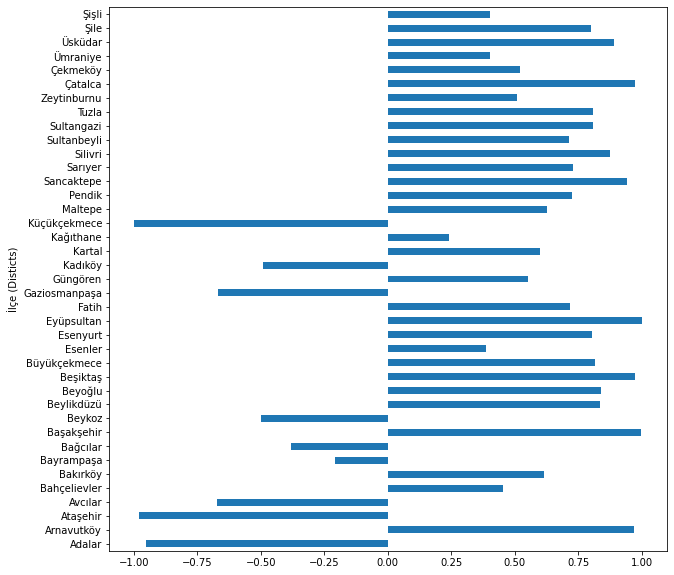

In [65]:
fig = plt.figure(figsize=(10,10))
corr_matrix.plot.barh()

### İstanbul geneli ortalama evsel atık miktarı

In [66]:
df.mean().sum().astype(int)

6141497

### Atıkların % kaçı anadolu yakasına ait ve kaç ton

In [67]:
print("Atıkların %:",((df[semt_anadolu].mean().sum()/df.mean().sum())*100).astype(int),"ü Anadolu yakasına ait ve bu da",int(6141497*(34.54095233670486/100)),"Ton ediyor")

Atıkların %: 34 ü Anadolu yakasına ait ve bu da 2121331 Ton ediyor


### Atıkların % kaçı avrupa yakasına ait ve kaç ton

In [68]:
print("Atıkların %:",((df[semt_avrupa].mean().sum()/df.mean().sum())*100).astype(int),"i Anadolu yakasına ait ve bu da",int(6141497*(65.45904766329514/100)),"Ton ediyor")

Atıkların %: 65 i Anadolu yakasına ait ve bu da 4020165 Ton ediyor


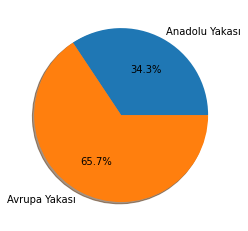

In [69]:
plt.pie([((df[semt_anadolu].mean().sum()/df.mean().sum())*100).astype(int),((df[semt_avrupa].mean().sum()/df.mean().sum())*100).astype(int)],
       labels=["Anadolu Yakası","Avrupa Yakası"],shadow=True,autopct='%1.1f%%');

plt.show()


### İstanbul geneli kişi başına düşen ortalama evsel atık miktarı / KG cinsinden

In [70]:
kisi_basi_miktar=(df.mean().sum())*1000/df_nüfus.mean().sum()
print("Kişi başına düşen ortalama miktar :",kisi_basi_miktar,"[KG]")

Kişi başına düşen ortalama miktar : 393.49554539014576 [KG]


### Avrupa yakası genelinde kişi başına düşen ortalama evsel atık miktarı / KG cinsinden 

In [71]:
print("Kişi başına düşen ortalama miktar:",(df[semt_avrupa].mean().sum())*1000/df_nüfus[semt_avrupa].mean().sum(),"[KG]")

Kişi başına düşen ortalama miktar: 398.67127612160266 [KG]


### Anadolu yakası genelinde kişi başına düşen ortalama evsel atık miktarı / KG cinsinden  

In [72]:
print("Kişi başına düşen ortalama miktar:",(df[semt_anadolu].mean().sum())*1000/df_nüfus[semt_anadolu].mean().sum(),"[KG]")

Kişi başına düşen ortalama miktar: 384.0467552549695 [KG]


### İlçelere göre ortalama evsel atık miktarı dağılımı

In [73]:
ilcelerin_ortalama_atik_miktari=df.mean().astype(int) # ilçelerin ortalama evsel atık miktarları
ilcelerin_ortalama_atik_miktari[0:5]

İlçe (Disticts)
Adalar           13242
Arnavutköy      100514
Ataşehir        173870
Avcılar         149727
Bahçelievler    205373
dtype: int32

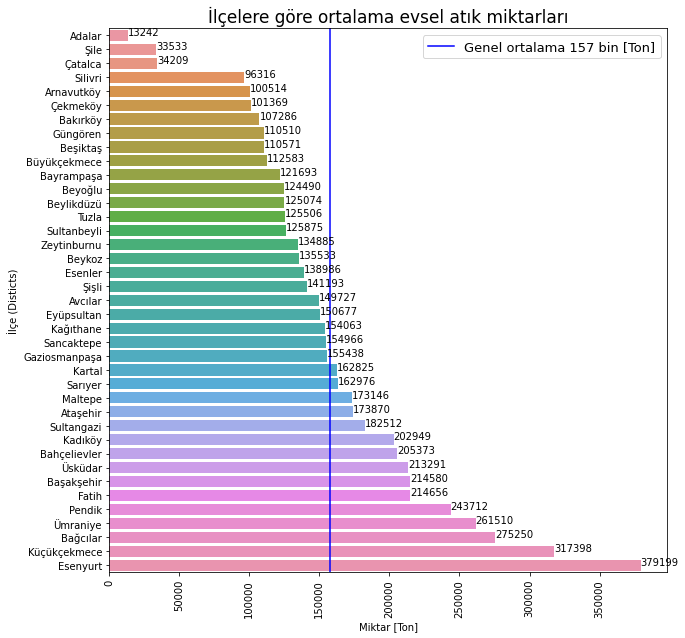

In [74]:
fig = plt.figure(figsize=(10,10))

sns.barplot(x=ilcelerin_ortalama_atik_miktari.sort_values().values,y=ilcelerin_ortalama_atik_miktari.sort_values().index)
plt.axvline(x = df.mean().astype(int).mean(), color = 'b', label = 'Genel ortalama 157 bin [Ton]')
for index, value in enumerate(ilcelerin_ortalama_atik_miktari.sort_values().values):
    plt.text(value, index, str(value))
plt.title("İlçelere göre ortalama evsel atık miktarları",fontsize=17)

plt.xlabel("Miktar [Ton]")
plt.xticks(rotation=90)
plt.legend(fontsize=13)

plt.show()

### İlçelere göre kişi başına düşen ortalama evsel atık miktarı

In [75]:
#KG Cinsinden
ilce_kisi_basi_ortalama_atık_miktari=((df.mean()*1000)/df_nüfus.mean()).astype(int)
ilce_kisi_basi_ortalama_atık_miktari.sort_values(inplace=True)
ilce_kisi_basi_ortalama_atık_miktari[0:5]

İlçe (Disticts)
Esenler          310
Gaziosmanpaşa    316
Avcılar          334
Maltepe          334
Pendik           335
dtype: int32

In [76]:
ilce_kisi_basi_ortalama_atık_miktari.mean()

430.8974358974359

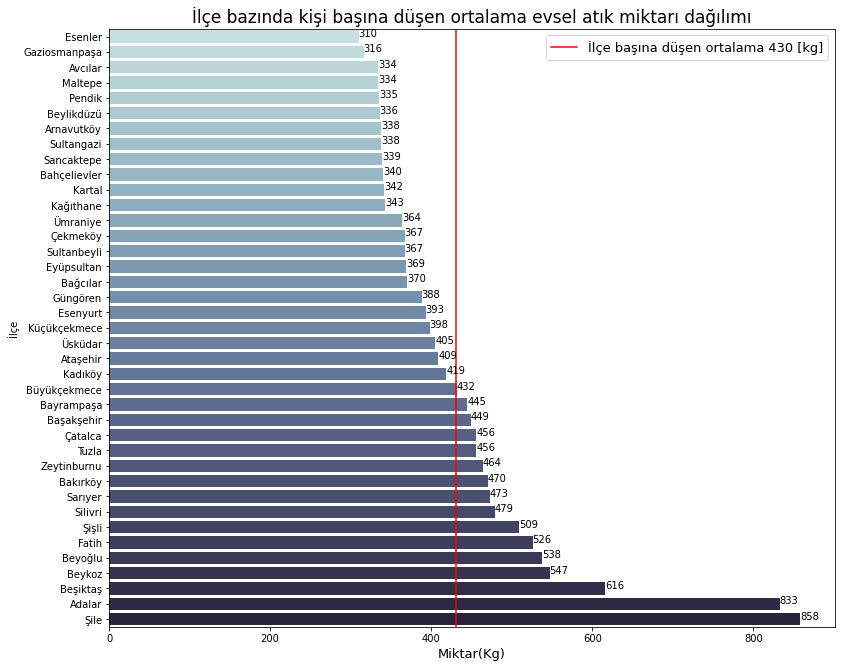

In [77]:
fig = plt.figure(figsize=(13,11))
sns.barplot(x=ilce_kisi_basi_ortalama_atık_miktari.values,y=ilce_kisi_basi_ortalama_atık_miktari.index,palette="ch:start=.2,rot=-.3");
plt.axvline(x = ilce_kisi_basi_ortalama_atık_miktari.mean(), color = 'r', label = 'İlçe başına düşen ortalama 430 [kg]')

plt.xlabel("Miktar(Kg)",fontsize=13)
plt.ylabel("İlçe")
plt.title("İlçe bazında kişi başına düşen ortalama evsel atık miktarı dağılımı",fontsize=17)
plt.legend(fontsize=13)

for index, value in enumerate(ilce_kisi_basi_ortalama_atık_miktari.values):
    plt.text(value, index, str(value))

plt.show()

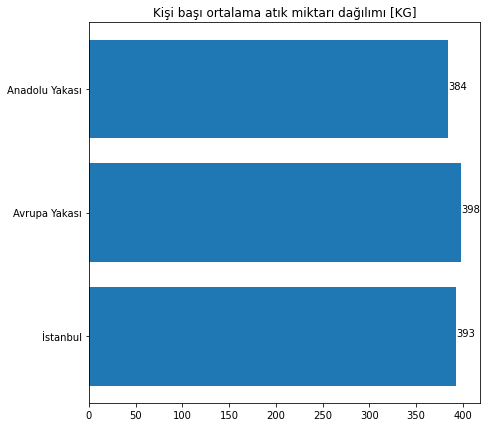

In [78]:
kisi_basi_gorseli=[393,398,384]

fig = plt.figure(figsize=(7,7))
plt.barh(width=kisi_basi_gorseli,y=["İstanbul","Avrupa Yakası","Anadolu Yakası"]);
plt.title("Kişi başı ortalama atık miktarı dağılımı [KG]")
for index, value in enumerate(kisi_basi_gorseli):
    plt.text(value, index, str(value))

plt.show()

### Avrupa yakası ilçeleri ortalama evsel atık miktarı grafiği

In [79]:
avrupa_ortalama_atik_miktari=df[semt_avrupa].mean().astype(int)
avrupa_ortalama_atik_miktari[0:5]


İlçe (Disticts)
Arnavutköy      100514
Avcılar         149727
Bağcılar        275250
Bahçelievler    205373
Bakırköy        107286
dtype: int32

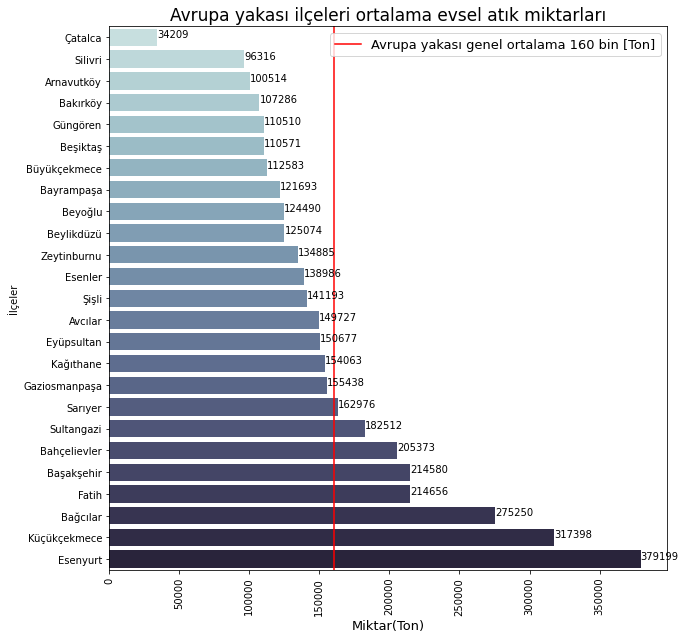

In [80]:
fig = plt.figure(figsize=(10,10))

sns.barplot(x=avrupa_ortalama_atik_miktari.sort_values().values,y=avrupa_ortalama_atik_miktari.sort_values().index,palette="ch:start=.2,rot=-.3")
plt.axvline(x = avrupa_ortalama_atik_miktari.mean(), color = 'r', label = 'Avrupa yakası genel ortalama 160 bin [Ton]')

for index, value in enumerate(avrupa_ortalama_atik_miktari.sort_values().values):
    plt.text(value, index, str(value))
plt.title("Avrupa yakası ilçeleri ortalama evsel atık miktarları",fontsize=17)
plt.ylabel("İlçeler")
plt.xlabel("Miktar(Ton)",fontsize=13)
plt.xticks(rotation=90)
plt.legend(fontsize=13)

plt.show()

### Anadolu yakası ilçeleri ortalama evsel atık miktarı grafiği

In [81]:
anadolu_ortalama_atik_miktari=df[semt_anadolu].mean().astype(int)
anadolu_ortalama_atik_miktari[0:5]

İlçe (Disticts)
Adalar       13242
Ataşehir    173870
Beykoz      135533
Çekmeköy    101369
Kadıköy     202949
dtype: int32

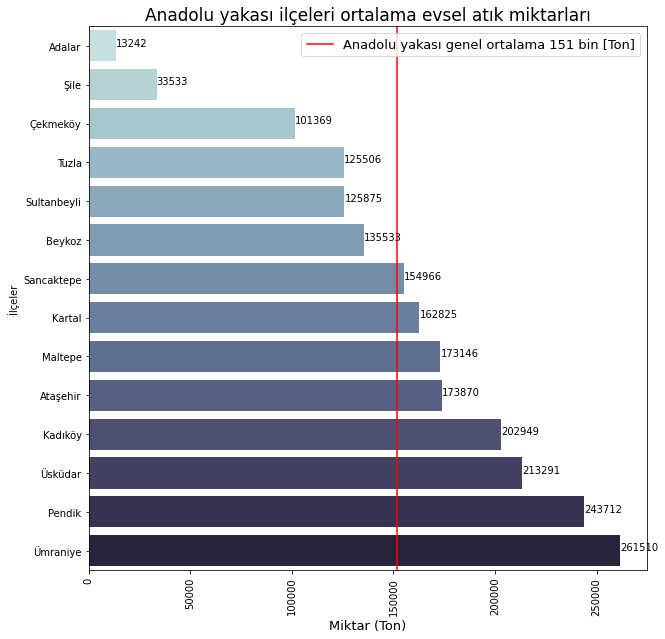

In [82]:
fig = plt.figure(figsize=(10,10))

sns.barplot(x=anadolu_ortalama_atik_miktari.sort_values().values,y=anadolu_ortalama_atik_miktari.sort_values().index,palette="ch:start=.2,rot=-.3")
plt.axvline(x = anadolu_ortalama_atik_miktari.mean(), color = 'r', label = 'Anadolu yakası genel ortalama 151 bin [Ton]')

for index, value in enumerate(anadolu_ortalama_atik_miktari.sort_values().values):
    plt.text(value, index, str(value))
plt.title("Anadolu yakası ilçeleri ortalama evsel atık miktarları",fontsize=17)
plt.ylabel("İlçeler")
plt.xlabel("Miktar (Ton)",fontsize=13)
plt.xticks(rotation=90)
plt.legend(fontsize=13)
plt.show()

### Avrupa yakası bazında ilçelere göre kişi başına düşen ortalama atık miktarı grafiği

In [83]:
avrupa_basi_ortalama_atık_miktari=((df[semt_avrupa].mean()*1000)/df_nüfus[semt_avrupa].mean()).astype(int)
avrupa_basi_ortalama_atık_miktari.sort_values(inplace=True)


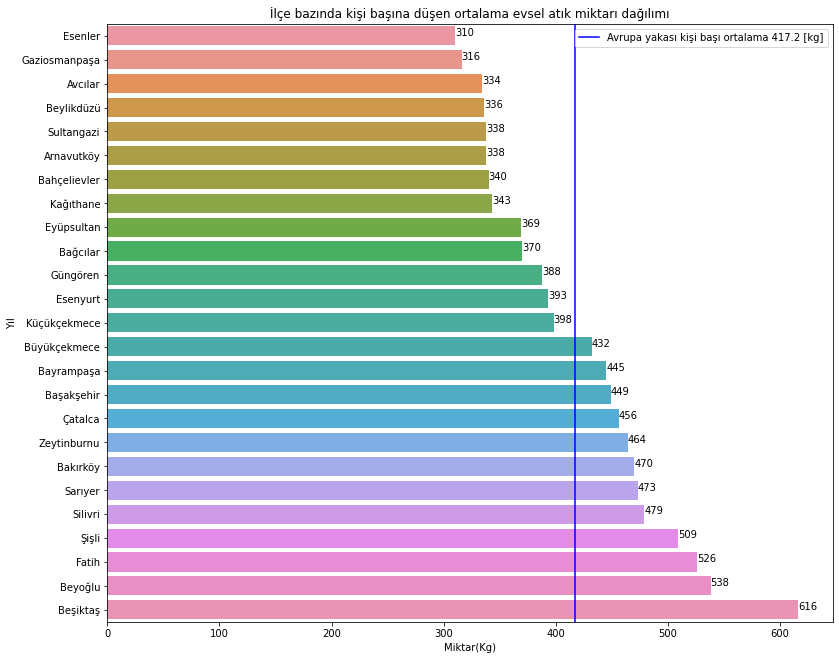

In [84]:
fig = plt.figure(figsize=(13,11))
sns.barplot(x=avrupa_basi_ortalama_atık_miktari.values,y=avrupa_basi_ortalama_atık_miktari.index);
plt.axvline(x = avrupa_basi_ortalama_atık_miktari.mean(), color = 'b', label = 'Avrupa yakası kişi başı ortalama 417.2 [kg]')


plt.xlabel("Miktar(Kg)")
plt.ylabel("Yıl")
plt.title("İlçe bazında kişi başına düşen ortalama evsel atık miktarı dağılımı")
plt.legend()

for index, value in enumerate(avrupa_basi_ortalama_atık_miktari.values):
    plt.text(value, index, str(value))
    
plt.show()

### Anadolu yakası bazında ilçelere göre kişi başına düşen ortalama atık miktarı grafiği

In [85]:
anadolu_basi_ortalama_atık_miktari=((df[semt_anadolu].mean()*1000)/df_nüfus[semt_anadolu].mean()).astype(int)
anadolu_basi_ortalama_atık_miktari.sort_values(inplace=True)


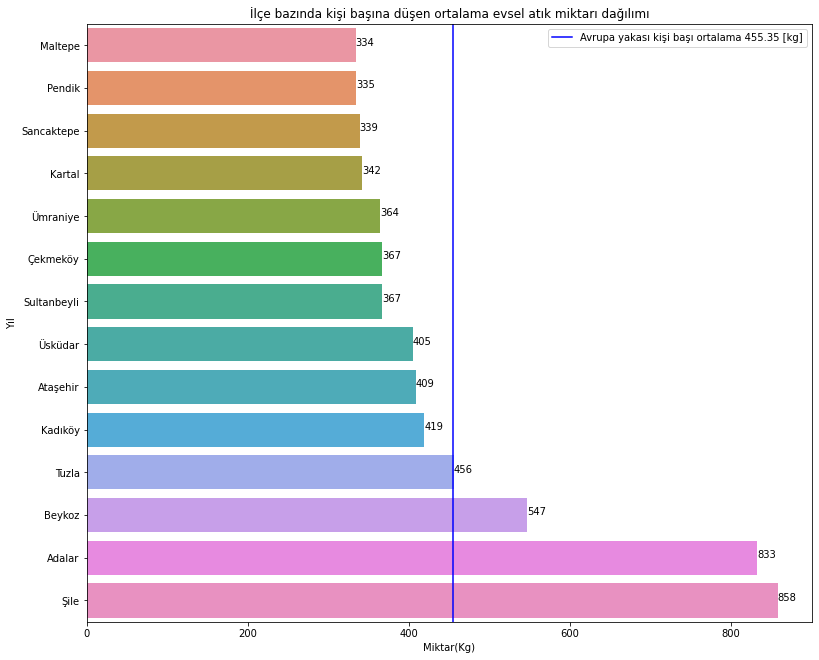

In [86]:
fig = plt.figure(figsize=(13,11))
sns.barplot(x=anadolu_basi_ortalama_atık_miktari.values,y=anadolu_basi_ortalama_atık_miktari.index);
plt.axvline(x = anadolu_basi_ortalama_atık_miktari.mean(), color = 'b', label = 'Avrupa yakası kişi başı ortalama 455.35 [kg]')

plt.xlabel("Miktar(Kg)")
plt.ylabel("Yıl")
plt.title("İlçe bazında kişi başına düşen ortalama evsel atık miktarı dağılımı")
plt.legend()

for index, value in enumerate(anadolu_basi_ortalama_atık_miktari.values):
    plt.text(value, index, str(value))
    
plt.show()